### Test the processImage pipeline on a single image

In [1]:
# Specify test image path here

TEST_IMAGE_PATH = "test_images/solidYellowCurve.jpg"

import os
imgs = os.listdir("test_images/")
imgs = ["test_images/" + x for x in  imgs ]
IMAGES = [TEST_IMAGE_PATH, "all"]
IMAGES = IMAGES + imgs
print(IMAGES)

# Editable Parameters

hyperParamsDefault = {
    "blurKernalSize": (5,1,19,2),  # (value, min, max, step)
    "cannyHT": (320,0,500,10),
    "cannyLT": (80,0,500,10),
    "images": IMAGES
}

['test_images/solidYellowCurve.jpg', 'all', 'test_images/solidWhiteCurve.jpg', 'test_images/solidWhiteRight.jpg', 'test_images/solidYellowCurve.jpg', 'test_images/solidYellowCurve2.jpg', 'test_images/solidYellowLeft.jpg', 'test_images/whiteCarLaneSwitch.jpg']


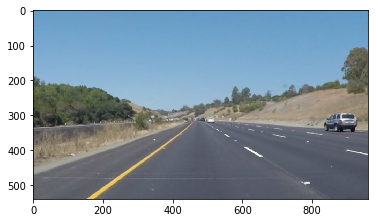

In [2]:
# Display the raw image
import matplotlib.image as mpimg; import matplotlib.pyplot as plt
%matplotlib inline
image = mpimg.imread(TEST_IMAGE_PATH); plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

In [3]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import helpers
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

%load_ext autoreload
%autoreload 2

from helpers import *
from lanedetector import detectLanes
from io import BytesIO
from base64 import b64encode
from PIL import Image
from IPython.core.display import display, HTML


In [4]:

def parseParams(hyParams):
    outP = {}
    for k in hyParams:
        try:
            outP[k] = hyParams[k][0]
        except:
            outP[k] = hyParams[k]
    return outP

def parseParamsInteract(hyParams):
    outP = {}
    for k in hyParams:
        try:
            outP[k] = (hyParams[k][1:])
        except:
            outP[k] = hyParams[k]
    return outP
        
hyperParams = parseParams(hyperParamsDefault)
hyperParamsInteract = parseParamsInteract(hyperParamsDefault)
print(hyperParams)
print(hyperParamsInteract)

{'images': 'test_images/solidYellowCurve.jpg', 'cannyLT': 80, 'blurKernalSize': 5, 'cannyHT': 320}
{'images': ['all', 'test_images/solidWhiteCurve.jpg', 'test_images/solidWhiteRight.jpg', 'test_images/solidYellowCurve.jpg', 'test_images/solidYellowCurve2.jpg', 'test_images/solidYellowLeft.jpg', 'test_images/whiteCarLaneSwitch.jpg'], 'cannyLT': (0, 500, 10), 'blurKernalSize': (1, 19, 2), 'cannyHT': (0, 500, 10)}


In [5]:
# %load lanedetector.py
from helpers import *

def detectLanes(img, params):

    blkrSize = params["blurKernalSize"]
    cht = params["cannyHT"]
    clt = params["cannyLT"]

    blur_gray = gaussian_blur(grayscale(img), kernel_size=blkrSize)
       
    ht = cht
    lt = clt
    canny_edges = canny(blur_gray, low_threshold=lt, high_threshold=ht)

    return canny_edges


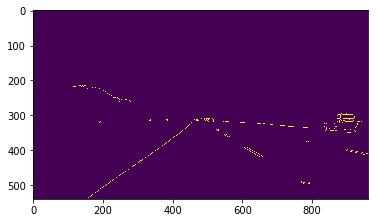

In [6]:
showimg(detectLanes(image, hyperParams))

In [7]:
# InLine image display helpers

def getPngBytes(img):
    pil_im = Image.fromarray(img)
    b = BytesIO()  
    pil_im.save(b, format='png')
    return b.getvalue()
    
def displaySideBySide(im1, im2):
    
    b1 = getPngBytes(im1)
    b2 = getPngBytes(im2)
    b641 = b64encode(b1).decode('utf-8')
    b642 = b64encode(b2).decode('utf-8')
    HTMLDATA = "<table><tr><td><img src='data:image/png;base64,{0}'/></td><td><img src='data:image/png;base64,{1}'/></td></tr></table>".format(b641, b642)
    display(HTML(HTMLDATA))

In [8]:
# Interactive parameter tuning

PLAYED_PARAMS = {}

def assignDefaults(wids, defVal):
    valDict = {}
    for wid in wids.children:
        try:
            valDict[wid.description] = wid
        except:
            pass
    for k in valDict:
        try:
            valDict[k].value = defVal[k]
        except:
            pass

def processImgPath(imgPath, kwargs):
    image = mpimg.imread(imgPath)
    outP =(detectLanes(image, kwargs))
    displaySideBySide(image, outP)

def playWithParams(**kwargs):
    global PLAYED_PARAMS
    PLAYED_PARAMS = kwargs
    try:
        if kwargs["images"] == "all":
            for imgPath in IMAGES[2:]:
                processImgPath(imgPath, kwargs)
        else:
            processImgPath(kwargs["images"], kwargs)
            
    except:
        pass
        #print "EXCEPTION!", e
        #outP = image
    
w = interactive(playWithParams, **hyperParamsInteract)
assignDefaults(w, hyperParams)
display(w)

test_images/solidYellowCurve.jpg
80
5
320


Widget Javascript not detected.  It may not be installed or enabled properly.
